<a href="https://colab.research.google.com/github/huongtravo0910/sales_prediction_linear_regression/blob/sales_prediction_linear_regression/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
class CustomLinearRegression:
    def __init__(self, X_data, y_target, learning_rate=0.01, num_epochs=10000):
        self.num_samples = X_data.shape[0]
        self.X_data = np.c_[np.ones((self.num_samples, 1)), X_data]
        self.y_target = y_target
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.num_features = self.X_data.shape[1]

        # Initial weights
        self.theta = np.random.randn(self.X_data.shape[1], 1)
        self.losses = []

    def compute_loss(self, y_pred, y_target):
        loss = (y_pred-y_target)**2
        loss = np.mean(loss)
        return loss

    def predict(self, X_data):
        if X_data.shape[1] == self.num_features:
            y_pred = X_data.dot(self.theta)
        else:
            X_data = np.c_[np.ones((X_data.shape[0], 1)), X_data]
            y_pred = X_data.dot(self.theta)
        return y_pred

    def fit(self):
        for epoch in range(self.num_epochs):
            # predict
            y_pred = self.predict(self.X_data)

            # compute loss
            loss = self.compute_loss(y_pred, self.y_target)
            self.losses.append(loss)

            # compute gradient
            loss_grd = 2*(y_pred-self.y_target)/self.num_samples
            gradients = self.X_data.T.dot(loss_grd)

            # update weight
            self.theta = self.theta - self.learning_rate*gradients

            if (epoch % 50) == 0:
                print(f'Epoch: {epoch} - Loss: {loss}')

        return {
            'loss': sum(self.losses)/len(self.losses),
            'weight': self.theta
        }

In [6]:
!gdown 1A8kK0IEsT3w8htzU18ihFr5UV-euhquC

Downloading...
From: https://drive.google.com/uc?id=1A8kK0IEsT3w8htzU18ihFr5UV-euhquC
To: /content/SalesPrediction.csv
100% 206k/206k [00:00<00:00, 74.8MB/s]


In [8]:
def r2_score(y_pred,y):
  y_mean = np.mean(y)
  ss_tot = np.sum((y - y_mean)**2)
  ss_res = np.sum((y - y_pred)**2)
  r2 = 1 - (ss_res / ss_tot)
  return r2

# Question 4:

# Case 1
y_pred = np.array([1 , 2 , 3 , 4 , 5])
y = np.array([1 , 2 , 3 , 4 , 5])
print(r2_score(y_pred,y))

# Case 2
y_pred = np.array([1 , 2 , 3 , 4 , 5])
y = np.array([3 , 5 , 5 , 2 , 4])
print(r2_score(y_pred,y))

1.0
-2.235294117647059


In [9]:
df = pd.read_csv('./SalesPrediction.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [14]:
df.isnull().sum()

,0
TV,10
Radio,4
Social Media,6
Influencer,0
Sales,6


In [15]:
df.describe()

,TV,Radio,Social Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


In [16]:
df = pd.get_dummies(df)
df.head()

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,16.0,6.566231,2.907983,54.732757,False,True,False,False
1,13.0,9.237765,2.409567,46.677897,False,True,False,False
2,41.0,15.886446,2.913410,150.177829,False,True,False,False
3,83.0,30.020028,6.922304,298.246340,False,True,False,False
4,15.0,8.437408,1.405998,56.594181,False,False,True,False


In [17]:
df = df.fillna(df.mean())

In [18]:
df.isnull().sum()

,0
TV,0
Radio,0
Social Media,0
Sales,0
Influencer_Macro,0
Influencer_Mega,0
Influencer_Micro,0
Influencer_Nano,0


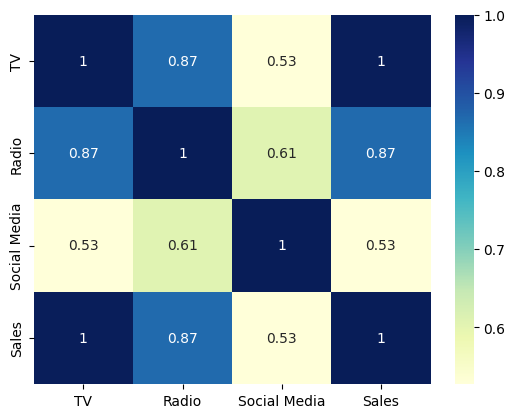

In [19]:
new_df = df[['TV', 'Radio', 'Social Media', 'Sales']]
sns.heatmap(new_df.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

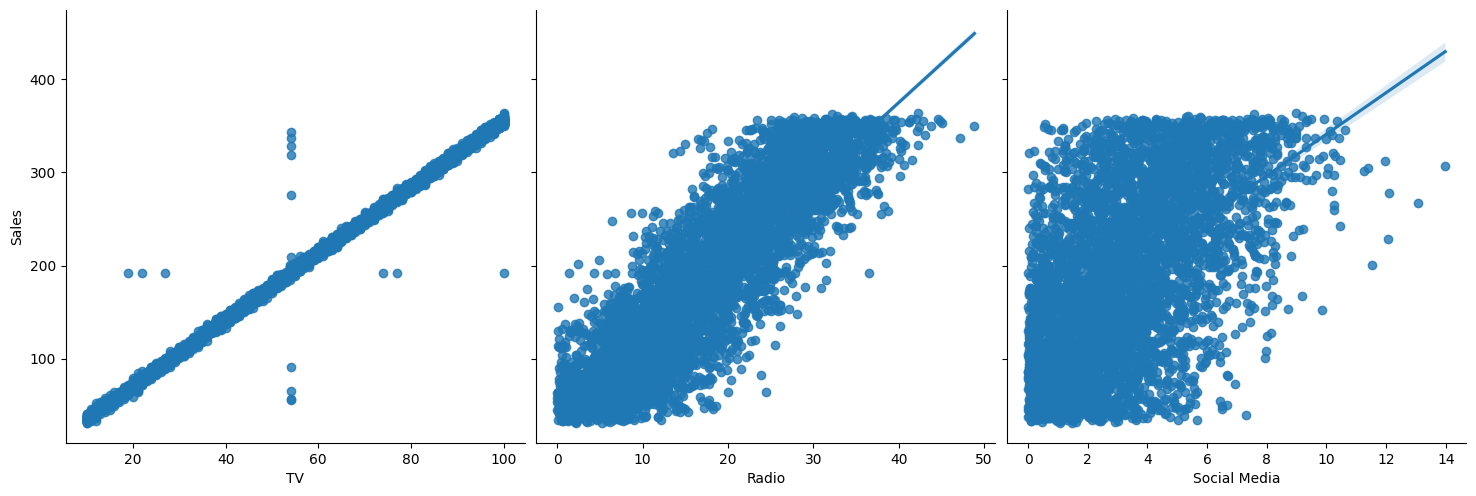

In [20]:
sns.pairplot(data = df,
    x_vars = ['TV', 'Radio', 'Social Media'],
    y_vars = 'Sales',
    height = 5,
    kind = 'reg'
)
plt.show()

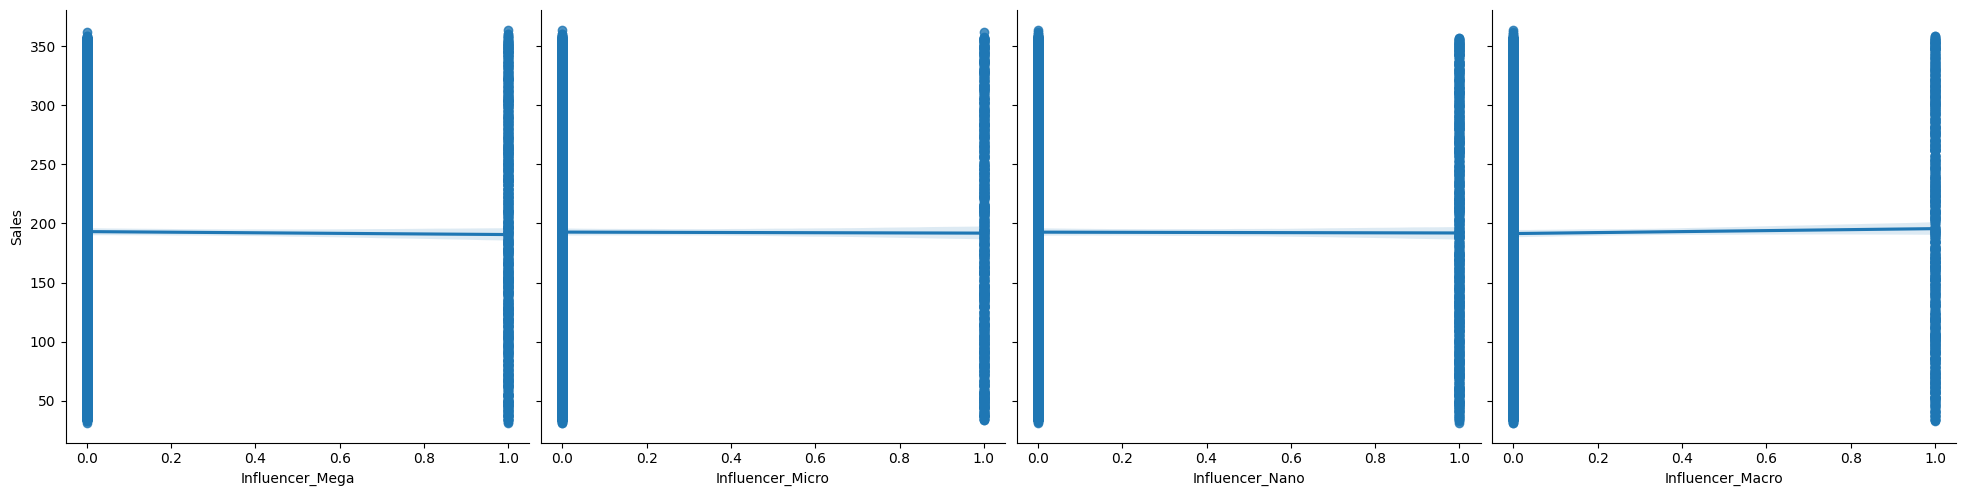

In [21]:
sns.pairplot(data = df,
    x_vars = ['Influencer_Mega', 'Influencer_Micro', 'Influencer_Nano', 'Influencer_Macro'],
    y_vars = 'Sales',
    height = 5,
    kind = 'reg'
)
plt.show()

In [22]:
df.columns

Index(['TV', 'Radio', 'Social Media', 'Sales', 'Influencer_Macro',
       'Influencer_Mega', 'Influencer_Micro', 'Influencer_Nano'],
      dtype='object')

In [23]:
X = df[['TV', 'Radio', 'Social Media', 'Influencer_Macro', 'Influencer_Mega', 'Influencer_Micro', 'Influencer_Nano']]
X

,TV,Radio,Social Media,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,16.0,6.566231,2.907983,False,True,False,False
1,13.0,9.237765,2.409567,False,True,False,False
2,41.0,15.886446,2.913410,False,True,False,False
3,83.0,30.020028,6.922304,False,True,False,False
4,15.0,8.437408,1.405998,False,False,True,False
...,...,...,...,...,...,...,...
4567,26.0,4.472360,0.717090,False,False,True,False
4568,71.0,20.610685,6.545573,False,False,False,True
4569,44.0,19.800072,5.096192,False,False,True,False
4570,71.0,17.534640,1.940873,True,False,False,False


In [24]:
y = df[['Sales']]
y

,Sales
0,54.732757
1,46.677897
2,150.177829
3,298.246340
4,56.594181
...,...
4567,94.685866
4568,249.101915
4569,163.631457
4570,253.610411


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [41]:
from sklearn.preprocessing import StandardScaler # Chuẩn hoá dữ liệu

scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train)

In [42]:
X_train_processed

array([[ 0.33869282, -0.3935435 , -0.17228084, ..., -0.57948652,
         1.73167391, -0.57848122],
       [-0.19852366, -0.28899849, -1.47661593, ...,  1.72566569,
        -0.57747593, -0.57848122],
       [-0.42875929, -1.07436552, -0.55865556, ..., -0.57948652,
        -0.57747593,  1.72866459],
       ...,
       [-1.61831007, -1.72922605,  0.58649299, ..., -0.57948652,
        -0.57747593,  1.72866459],
       [-0.58224971, -0.91383556, -1.22645549, ..., -0.57948652,
         1.73167391, -0.57848122],
       [-1.27295662, -1.45779228, -1.04859981, ..., -0.57948652,
         1.73167391, -0.57848122]])

In [28]:
X_test_processed = scaler.fit_transform(X_test)
X_test_processed

array([[-0.33831381, -0.09176884, -0.8349793 , ..., -0.58831925,
         1.70271102, -0.57097333],
       [ 0.77025605,  1.17821405, -0.43886714, ..., -0.58831925,
        -0.58729872,  1.75139529],
       [ 1.15252152,  1.04864751,  1.09352839, ...,  1.69975741,
        -0.58729872, -0.57097333],
       ...,
       [ 0.96138879,  1.12388703,  1.09651853, ...,  1.69975741,
        -0.58729872, -0.57097333],
       [-0.4147669 , -0.29991669,  1.2298153 , ...,  1.69975741,
        -0.58729872, -0.57097333],
       [-0.91171201, -1.21956787, -0.31431739, ...,  1.69975741,
        -0.58729872, -0.57097333]])

In [29]:
# Custom Model
linear_model = CustomLinearRegression(X_train_processed, y_train, learning_rate=0.1, num_epochs=250)
linear_model.fit()

Epoch: 0 - Loss: 46201.559063572065
Epoch: 50 - Loss: 102.04174291054653
Epoch: 100 - Loss: 68.58252012795975
Epoch: 150 - Loss: 65.98391307210004
Epoch: 200 - Loss: 65.78198469219848


{'loss': 580.7606890546865,
 'weight': array([[1.92950605e+02],
        [9.10223072e+01],
        [1.85296937e+00],
        [1.77524172e-01],
        [4.16652542e-01],
        [6.53314712e-01],
        [6.51480990e-01],
        [6.36420671e-01]])}

In [30]:
preds = linear_model.predict(X_test_processed)

In [31]:
r2_score(y_test, preds)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
Sales,0.995004


In [32]:
# Use library
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train_processed, y_train)

LinearRegression()

In [33]:
preds = linear_model.predict(X_test_processed)
r2_score(y_test, preds)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
Sales,0.995012


#### Use polynomial

In [34]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(X_train_processed)

In [35]:
linear_model = CustomLinearRegression(X_train_poly, y_train, learning_rate=0.001, num_epochs=500)
linear_model.fit()

Epoch: 0 - Loss: 47607.71354097595
Epoch: 50 - Loss: 3464.21435558338
Epoch: 100 - Loss: 1353.0791277795329
Epoch: 150 - Loss: 814.3386419057232
Epoch: 200 - Loss: 552.3858216458892
Epoch: 250 - Loss: 405.6270585616385
Epoch: 300 - Loss: 319.0806404558966
Epoch: 350 - Loss: 265.61948290626486
Epoch: 400 - Loss: 230.8040906552221
Epoch: 450 - Loss: 206.787755967618


{'loss': 1946.9872661545369,
 'weight': array([[ 1.29083798e+01],
        [ 1.34771543e+01],
        [ 1.11935388e+01],
        [ 5.76163332e+00],
        [ 8.74932892e-01],
        [-5.88844390e-02],
        [ 1.02418337e+00],
        [-1.75428454e+00],
        [-2.00197624e+00],
        [ 3.59395535e+00],
        [ 6.12788187e-01],
        [-1.63655530e+00],
        [ 1.22238245e+00],
        [-7.19904370e-01],
        [-4.45529897e-02],
        [-9.76065046e-01],
        [ 8.58440679e-01],
        [-1.37962641e+00],
        [-9.16547363e-01],
        [-2.19013763e+00],
        [-2.72315382e-01],
        [-5.18913191e-01],
        [ 3.98231426e+00],
        [ 8.76735484e-03],
        [-5.77804521e-01],
        [ 8.47018122e-02],
        [ 7.46573479e-01],
        [ 1.21522632e+01],
        [-4.21521966e+00],
        [-1.87079942e+00],
        [-6.97077822e+00],
        [ 1.12883401e+01],
        [-4.53590267e+00],
        [-5.47908593e+00],
        [ 1.23318430e+01],
        [-4.2310

In [36]:
X_test_poly = poly_features.transform(X_test_processed)

In [37]:
preds = linear_model.predict(X_test_poly)
r2_score(y_test, preds)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
Sales,0.970531


In [38]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train_poly, y_train)

LinearRegression()

In [39]:
preds = linear_model.predict(X_test_poly)
r2_score(y_test, preds)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
Sales,-0.005398


In [40]:
# Question 10
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train)
scaler.mean_[0]

54.173577723283785